In [9]:
import os
import pandas as pd
import numpy as np

In [24]:
PATH_TO_OCS = "/home/ign.fr/skhelifi/data/ocsge-samy"
PATH_TO_CONF = "/home/ign.fr/skhelifi/data/ocsge-samy/mat_conf"

In [11]:
mat_conf = pd.read_csv(os.path.join(PATH_TO_CONF, "matrice_confusion_ocs.csv"))
mat_conf.head()

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0  CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1  CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2  CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3  CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4  CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   

                         ID_PROD DEP   PVA  
0  OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015  
1  OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015  
2  OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015  
3  OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015  
4  OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015

In [12]:
mat_conf["CODE_CS"].unique()

array(['CS1.1.1.1', 'CS1.1.1.2', 'CS1.1.2.1', 'CS1.1.2.2', 'CS1.2.1',
       'CS1.2.2', 'CS2.1.1.1', 'CS2.1.1.2', 'CS2.1.1.3', 'CS2.1.2',
       'CS2.1.3', 'CS2.2.1', 'CS2.2.2', 'CS1.2.3'], dtype=object)

In [13]:
artif = ['CS1.1.1.1', 'CS1.1.1.2', 'CS1.1.2.1', 'CS1.1.2.2']
CODE_CS = mat_conf["CODE_CS"].unique()
non_artif =list(set(CODE_CS) - set(artif))
non_artif

['CS1.2.3',
 'CS2.2.2',
 'CS1.2.1',
 'CS2.1.1.2',
 'CS1.2.2',
 'CS2.1.1.1',
 'CS2.1.3',
 'CS2.1.2',
 'CS2.1.1.3',
 'CS2.2.1']

In [14]:
sans_vegetation = ['CS1.1.1.1', 'CS1.1.1.2', 'CS1.1.2.1', 'CS1.1.2.2', 'CS1.2.1',
       'CS1.2.2', 'CS2.1.1.1', 'CS2.1.1.2']
vegetation = list(set(CODE_CS) - set(sans_vegetation))
vegetation

['CS1.2.3', 'CS2.2.2', 'CS2.1.3', 'CS2.1.2', 'CS2.1.1.3', 'CS2.2.1']

In [18]:
mat_conf["artif"] = mat_conf["CODE_CS"].apply(lambda x: "artif" if x in artif else "non artif")
mat_conf

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0     CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1     CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2     CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3     CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4     CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   
...         ...      ...       ...           ...           ...           ...   
1826    CS2.2.1  US4.1.3         0  1.063173e+06  6.303461e+09  3.654863e+08   
1827    CS2.2.1    US4.3         0  1.308271e+06  6.303461e+09  3.654863e+08   
1828    CS2.2.1    US6.1         0  4.329512e+05  6.303461e+09  3.654863e+08   
1829    CS2.2.1    US6.2         0  1.480391e+04  6.303461e+09  3.654863e+08   
1830    CS2.2.1    US6.3         0  3.308270e+07  6.303461e+09  3.654863e+08   

                            ID_PROD DEP   PVA      artif  
0     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  
1     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  
2     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  
3     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  
4     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  
...                             ...  ..   ...        ...  
1826  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  
1827  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  
1828  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  
1829  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  
1830  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  

[1831 rows x 10 columns]

In [19]:
mat_conf["vegetation"] = mat_conf["CODE_CS"].apply(lambda x: "avec végétation" if x in vegetation else "sans végétation")
mat_conf

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0     CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1     CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2     CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3     CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4     CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   
...         ...      ...       ...           ...           ...           ...   
1826    CS2.2.1  US4.1.3         0  1.063173e+06  6.303461e+09  3.654863e+08   
1827    CS2.2.1    US4.3         0  1.308271e+06  6.303461e+09  3.654863e+08   
1828    CS2.2.1    US6.1         0  4.329512e+05  6.303461e+09  3.654863e+08   
1829    CS2.2.1    US6.2         0  1.480391e+04  6.303461e+09  3.654863e+08   
1830    CS2.2.1    US6.3         0  3.308270e+07  6.303461e+09  3.654863e+08   

                            ID_PROD DEP   PVA      artif       vegetation  
0     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation  
1     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation  
2     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation  
3     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation  
4     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation  
...                             ...  ..   ...        ...              ...  
1826  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation  
1827  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation  
1828  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation  
1829  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation  
1830  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation  

[1831 rows x 11 columns]

In [38]:
dico_poste_ocs_N4 = {'CS1.1.1.1': 'Zones_baties' ,
                  'CS1.1.1.2': 'Zones non baties',
                  'CS1.1.2.1': 'Zones à matériaux minéraux',
                  'CS1.1.2.2': 'Zones à autres matériaux composites',
                  'CS2.1.1 1': 'Peuplement de feuillus',
                  'CS2.1.1 2': 'Peuplement de conifères',
                  'CS2.1.1 3': 'Peuplement mixte'}

dico_poste_ocs_N3 = {'CS1.1.1': 'Zones imperméables',
                     'CS1.1.2': 'Zones perméables',
                     'CS1.2.1': 'Sols nus',
                     'CS1.2.2': 'Surfaces d''eau',
                     'CS1.2.3': 'Névés et glaciers',
                     'CS2.1.1': 'Formations arborées',
                     'CS2.1.2': 'Formations arbustives et sous-arbrisseaux',
                     'CS2.1.3': 'Autres formations ligneuses',
                     'CS2.2.1': 'Formations herbacées',
                     'CS2.2.2': 'Autres formations non ligneuses'
}

dico_poste_ocs_N2 = {'CS1.1': 'Surfaces anthropisées', 'CS1.2': 'Surfaces naturelles', 'CS2.1': 'Végétation ligneuse',
                    'CS2.2': 'Végétation non ligneuse'}
dico_poste_ocs_N1 = {'CS1': 'Sans végétation', 'CS2': 'Avec végétation'}

dico_poste_us_N2 = {'US1.1': 'Agriculture',
                    'US1.2': 'Sylviculture',
                    'US1.3': 'Activités d’extraction',
                    'US1.4': 'Pêche et aquaculture',
                    'US1.5': 'Autre',
                    'US2': 'Secondaire',
                    'US3': 'Tertiaire',
                    'US5': 'Résidentiel',
                    'US4.1': 'Réseaux de transport',
                    'US4.2': 'Services de logistique et de stockage',
                    'US4.3': 'Réseaux d’utilité publique',
                    'US6.1': 'Zones en transition',
                    'US6.2': 'Zones abandonnées',
                    'US6.3': 'Sans usage',
                    'US6.6': 'Usage Inconnu'
                   }
dico_poste_us_N1 = {'US1': 'Production primaire',
                    'US2': 'Production secondaire, tertiaire et usage résidentiel',
                    'US3': 'Production secondaire, tertiaire et usage résidentiel',
                    'US5': 'Production secondaire, tertiaire et usage résidentiel',
                    'US4': 'Réseaux de transport logistiques et infrastructures',
                    'US6': 'Autre usage'}
dico_poste_us_N3 = {'US4.1.1': 'Routier',
'US4.1.2': 'Ferré',
'US4.1.3': 'Aérien',
'US4.1.4': 'Eau',
'US4.1.5': 'Autres réseaux de transport'}

In [26]:
import json

with open(os.path.join(PATH_TO_OCS, 'dico_poste_ocs_N4.json'), 'w') as fp:
    json.dump(dico_poste_ocs_N4, fp)

In [27]:
with open(os.path.join(PATH_TO_OCS, 'dico_poste_ocs_N3.json'), 'w') as fp:
    json.dump(dico_poste_ocs_N3, fp)
with open(os.path.join(PATH_TO_OCS, 'dico_poste_ocs_N2.json'), 'w') as fp:
    json.dump(dico_poste_ocs_N2, fp)
with open(os.path.join(PATH_TO_OCS, 'dico_poste_ocs_N1.json'), 'w') as fp:
    json.dump(dico_poste_ocs_N1, fp)
with open(os.path.join(PATH_TO_OCS, 'dico_poste_us_N2.json'), 'w') as fp:
    json.dump(dico_poste_us_N2, fp)
with open(os.path.join(PATH_TO_OCS, 'dico_poste_us_N1.json'), 'w') as fp:
    json.dump(dico_poste_us_N1, fp)

In [30]:
mat_conf["ocs_n1"] = mat_conf["CODE_CS"].apply(lambda x: dico_poste_ocs_N1[x[0:3]])
mat_conf

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0     CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1     CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2     CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3     CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4     CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   
...         ...      ...       ...           ...           ...           ...   
1826    CS2.2.1  US4.1.3         0  1.063173e+06  6.303461e+09  3.654863e+08   
1827    CS2.2.1    US4.3         0  1.308271e+06  6.303461e+09  3.654863e+08   
1828    CS2.2.1    US6.1         0  4.329512e+05  6.303461e+09  3.654863e+08   
1829    CS2.2.1    US6.2         0  1.480391e+04  6.303461e+09  3.654863e+08   
1830    CS2.2.1    US6.3         0  3.308270e+07  6.303461e+09  3.654863e+08   

                            ID_PROD DEP   PVA      artif       vegetation  \
0     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
1     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
2     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
3     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
4     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
...                             ...  ..   ...        ...              ...   
1826  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1827  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1828  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1829  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1830  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   

               ocs_n1  
0     Sans végétation  
1     Sans végétation  
2     Sans végétation  
3     Sans végétation  
4     Sans végétation  
...               ...  
1826  Avec végétation  
1827  Avec végétation  
1828  Avec végétation  
1829  Avec végétation  
1830  Avec végétation  

[1831 rows x 12 columns]

In [31]:
mat_conf["ocs_n2"] = mat_conf["CODE_CS"].apply(lambda x: dico_poste_ocs_N2[x[0:5]])
mat_conf

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0     CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1     CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2     CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3     CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4     CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   
...         ...      ...       ...           ...           ...           ...   
1826    CS2.2.1  US4.1.3         0  1.063173e+06  6.303461e+09  3.654863e+08   
1827    CS2.2.1    US4.3         0  1.308271e+06  6.303461e+09  3.654863e+08   
1828    CS2.2.1    US6.1         0  4.329512e+05  6.303461e+09  3.654863e+08   
1829    CS2.2.1    US6.2         0  1.480391e+04  6.303461e+09  3.654863e+08   
1830    CS2.2.1    US6.3         0  3.308270e+07  6.303461e+09  3.654863e+08   

                            ID_PROD DEP   PVA      artif       vegetation  \
0     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
1     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
2     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
3     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
4     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
...                             ...  ..   ...        ...              ...   
1826  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1827  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1828  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1829  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1830  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   

               ocs_n1                   ocs_n2  
0     Sans végétation    Surfaces anthropisées  
1     Sans végétation    Surfaces anthropisées  
2     Sans végétation    Surfaces anthropisées  
3     Sans végétation    Surfaces anthropisées  
4     Sans végétation    Surfaces anthropisées  
...               ...                      ...  
1826  Avec végétation  Végétation non ligneuse  
1827  Avec végétation  Végétation non ligneuse  
1828  Avec végétation  Végétation non ligneuse  
1829  Avec végétation  Végétation non ligneuse  
1830  Avec végétation  Végétation non ligneuse  

[1831 rows x 13 columns]

In [32]:
mat_conf["ocs_n3"] = mat_conf["CODE_CS"].apply(lambda x: dico_poste_ocs_N3[x[0:7]])
mat_conf

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0     CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1     CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2     CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3     CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4     CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   
...         ...      ...       ...           ...           ...           ...   
1826    CS2.2.1  US4.1.3         0  1.063173e+06  6.303461e+09  3.654863e+08   
1827    CS2.2.1    US4.3         0  1.308271e+06  6.303461e+09  3.654863e+08   
1828    CS2.2.1    US6.1         0  4.329512e+05  6.303461e+09  3.654863e+08   
1829    CS2.2.1    US6.2         0  1.480391e+04  6.303461e+09  3.654863e+08   
1830    CS2.2.1    US6.3         0  3.308270e+07  6.303461e+09  3.654863e+08   

                            ID_PROD DEP   PVA      artif       vegetation  \
0     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
1     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
2     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
3     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
4     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
...                             ...  ..   ...        ...              ...   
1826  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1827  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1828  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1829  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1830  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   

               ocs_n1                   ocs_n2                ocs_n3  
0     Sans végétation    Surfaces anthropisées    Zones imperméables  
1     Sans végétation    Surfaces anthropisées    Zones imperméables  
2     Sans végétation    Surfaces anthropisées    Zones imperméables  
3     Sans végétation    Surfaces anthropisées    Zones imperméables  
4     Sans végétation    Surfaces anthropisées    Zones imperméables  
...               ...                      ...                   ...  
1826  Avec végétation  Végétation non ligneuse  Formations herbacées  
1827  Avec végétation  Végétation non ligneuse  Formations herbacées  
1828  Avec végétation  Végétation non ligneuse  Formations herbacées  
1829  Avec végétation  Végétation non ligneuse  Formations herbacées  
1830  Avec végétation  Végétation non ligneuse  Formations herbacées  

[1831 rows x 14 columns]

In [34]:
mat_conf["ocs_n4"] = mat_conf["CODE_CS"].apply(lambda x:dico_poste_ocs_N4[x] if x in dico_poste_ocs_N4 else dico_poste_ocs_N3[x[0:7]])
mat_conf

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0     CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1     CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2     CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3     CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4     CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   
...         ...      ...       ...           ...           ...           ...   
1826    CS2.2.1  US4.1.3         0  1.063173e+06  6.303461e+09  3.654863e+08   
1827    CS2.2.1    US4.3         0  1.308271e+06  6.303461e+09  3.654863e+08   
1828    CS2.2.1    US6.1         0  4.329512e+05  6.303461e+09  3.654863e+08   
1829    CS2.2.1    US6.2         0  1.480391e+04  6.303461e+09  3.654863e+08   
1830    CS2.2.1    US6.3         0  3.308270e+07  6.303461e+09  3.654863e+08   

                            ID_PROD DEP   PVA      artif       vegetation  \
0     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
1     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
2     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
3     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
4     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
...                             ...  ..   ...        ...              ...   
1826  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1827  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1828  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1829  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1830  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   

               ocs_n1                   ocs_n2                ocs_n3  \
0     Sans végétation    Surfaces anthropisées    Zones imperméables   
1     Sans végétation    Surfaces anthropisées    Zones imperméables   
2     Sans végétation    Surfaces anthropisées    Zones imperméables   
3     Sans végétation    Surfaces anthropisées    Zones imperméables   
4     Sans végétation    Surfaces anthropisées    Zones imperméables   
...               ...                      ...                   ...   
1826  Avec végétation  Végétation non ligneuse  Formations herbacées   
1827  Avec végétation  Végétation non ligneuse  Formations herbacées   
1828  Avec végétation  Végétation non ligneuse  Formations herbacées   
1829  Avec végétation  Végétation non ligneuse  Formations herbacées   
1830  Avec végétation  Végétation non ligneuse  Formations herbacées   

                    ocs_n4  
0             Zones_baties  
1             Zones_baties  
2             Zones_baties  
3             Zones_baties  
4             Zones_baties  
...                    ...  
1826  Formations herbacées  
1827  Formations herbacées  
1828  Formations herbacées  
1829  Formations herbacées  
1830  Formations herbacées  

[1831 rows x 15 columns]

In [35]:
mat_conf["ocs_n4"].unique()

array(['Zones_baties', 'Zones non baties', 'Zones à matériaux minéraux',
       'Zones à autres matériaux composites', 'Sols nus', 'Surfaces deau',
       'Formations arborées', 'Formations arbustives et sous-arbrisseaux',
       'Autres formations ligneuses', 'Formations herbacées',
       'Autres formations non ligneuses', 'Névés et glaciers'],
      dtype=object)

In [36]:
mat_conf["us_n1"] = mat_conf["CODE_US"].apply(lambda x: dico_poste_us_N1[x[0:3]])
mat_conf

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0     CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1     CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2     CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3     CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4     CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   
...         ...      ...       ...           ...           ...           ...   
1826    CS2.2.1  US4.1.3         0  1.063173e+06  6.303461e+09  3.654863e+08   
1827    CS2.2.1    US4.3         0  1.308271e+06  6.303461e+09  3.654863e+08   
1828    CS2.2.1    US6.1         0  4.329512e+05  6.303461e+09  3.654863e+08   
1829    CS2.2.1    US6.2         0  1.480391e+04  6.303461e+09  3.654863e+08   
1830    CS2.2.1    US6.3         0  3.308270e+07  6.303461e+09  3.654863e+08   

                            ID_PROD DEP   PVA      artif       vegetation  \
0     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
1     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
2     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
3     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
4     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
...                             ...  ..   ...        ...              ...   
1826  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1827  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1828  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1829  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1830  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   

               ocs_n1                   ocs_n2                ocs_n3  \
0     Sans végétation    Surfaces anthropisées    Zones imperméables   
1     Sans végétation    Surfaces anthropisées    Zones imperméables   
2     Sans végétation    Surfaces anthropisées    Zones imperméables   
3     Sans végétation    Surfaces anthropisées    Zones imperméables   
4     Sans végétation    Surfaces anthropisées    Zones imperméables   
...               ...                      ...                   ...   
1826  Avec végétation  Végétation non ligneuse  Formations herbacées   
1827  Avec végétation  Végétation non ligneuse  Formations herbacées   
1828  Avec végétation  Végétation non ligneuse  Formations herbacées   
1829  Avec végétation  Végétation non ligneuse  Formations herbacées   
1830  Avec végétation  Végétation non ligneuse  Formations herbacées   

                    ocs_n4                                              us_n1  
0             Zones_baties                                Production primaire  
1             Zones_baties                                Production primaire  
2             Zones_baties  Production secondaire, tertiaire et usage rési...  
3             Zones_baties  Réseaux de transport logistiques et infrastruc...  
4             Zones_baties  Réseaux de transport logistiques et infrastruc...  
...                    ...                                                ...  
1826  Formations herbacées  Réseaux de transport logistiques et infrastruc...  
1827  Formations herbacées  Réseaux de transport logistiques et infrastruc...  
1828  Formations herbacées                                        Autre usage  
1829  Formations herbacées                                        Autre usage  
1830  Formations herbacées                                        Autre usage  

[1831 rows x 16 columns]

In [37]:
mat_conf["us_n2"] = mat_conf["CODE_US"].apply(lambda x: dico_poste_us_N2[x] if x in dico_poste_us_N2 else dico_poste_us_N1[x[0:3]])
mat_conf

CODE_CS  CODE_US  OSSATURE          area    total_area    total_bati  \
0     CS1.1.1.1    US1.1         0  7.349930e+06  4.161603e+09  2.583685e+08   
1     CS1.1.1.1    US1.3         0  3.055724e+04  4.161603e+09  2.583685e+08   
2     CS1.1.1.1    US235         0  6.484177e+07  4.161603e+09  2.583685e+08   
3     CS1.1.1.1  US4.1.1         0  9.373716e+03  4.161603e+09  2.583685e+08   
4     CS1.1.1.1  US4.1.2         0  8.850504e+04  4.161603e+09  2.583685e+08   
...         ...      ...       ...           ...           ...           ...   
1826    CS2.2.1  US4.1.3         0  1.063173e+06  6.303461e+09  3.654863e+08   
1827    CS2.2.1    US4.3         0  1.308271e+06  6.303461e+09  3.654863e+08   
1828    CS2.2.1    US6.1         0  4.329512e+05  6.303461e+09  3.654863e+08   
1829    CS2.2.1    US6.2         0  1.480391e+04  6.303461e+09  3.654863e+08   
1830    CS2.2.1    US6.3         0  3.308270e+07  6.303461e+09  3.654863e+08   

                            ID_PROD DEP   PVA      artif       vegetation  \
0     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
1     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
2     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
3     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
4     OCSGE_1_1_SHP_LAMB93_D66_2015  66  2015      artif  sans végétation   
...                             ...  ..   ...        ...              ...   
1826  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1827  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1828  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1829  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   
1830  OCSGE_1_1_SHP_LAMB93_D32_2013  32  2013  non artif  avec végétation   

               ocs_n1                   ocs_n2                ocs_n3  \
0     Sans végétation    Surfaces anthropisées    Zones imperméables   
1     Sans végétation    Surfaces anthropisées    Zones imperméables   
2     Sans végétation    Surfaces anthropisées    Zones imperméables   
3     Sans végétation    Surfaces anthropisées    Zones imperméables   
4     Sans végétation    Surfaces anthropisées    Zones imperméables   
...               ...                      ...                   ...   
1826  Avec végétation  Végétation non ligneuse  Formations herbacées   
1827  Avec végétation  Végétation non ligneuse  Formations herbacées   
1828  Avec végétation  Végétation non ligneuse  Formations herbacées   
1829  Avec végétation  Végétation non ligneuse  Formations herbacées   
1830  Avec végétation  Végétation non ligneuse  Formations herbacées   

                    ocs_n4                                              us_n1  \
0             Zones_baties                                Production primaire   
1             Zones_baties                                Production primaire   
2             Zones_baties  Production secondaire, tertiaire et usage rési...   
3             Zones_baties  Réseaux de transport logistiques et infrastruc...   
4             Zones_baties  Réseaux de transport logistiques et infrastruc...   
...                    ...                                                ...   
1826  Formations herbacées  Réseaux de transport logistiques et infrastruc...   
1827  Formations herbacées  Réseaux de transport logistiques et infrastruc...   
1828  Formations herbacées                                        Autre usage   
1829  Formations herbacées                                        Autre usage   
1830  Formations herbacées                                        Autre usage   

                                                  us_n2  
0                                           Agriculture  
1                                Activités d’extraction  
2     Production secondaire, tertiaire et usage rési...  
3     Réseaux de transport logistiques et infrastruc

In [42]:
PAYS_DE_LA_LOIRE = ["44", "49", "53", "72", "85"]
mat_conf["pays_de_la_loire"] = mat_conf["DEP"].apply(lambda x: "pays de la loire" if x in PAYS_DE_LA_LOIRE else "autres départements")
mat_conf["% total area"] = (mat_conf["area"] / mat_conf["total_area"]) * 100
mat_conf["% total bati"] = (mat_conf["total_bati"] / mat_conf["total_area"]) * 100
mat_conf.to_csv(os.path.join(PATH_TO_CONF, "mat_conf_2.csv"))

In [68]:
agg_mat_conf_by_dep = mat_conf.groupby(["DEP", "CODE_CS", "CODE_US"]).sum(["% total area", "% total bati"])
agg_mat_conf_by_dep.reset_index(level=[0, 1, 2], inplace=True)

In [70]:
agg_mat_conf_by_dep.to_csv(os.path.join(PATH_TO_CONF, "agg_mat_conf_by_dep.csv"))

<AxesSubplot:xlabel='CODE_CS'>

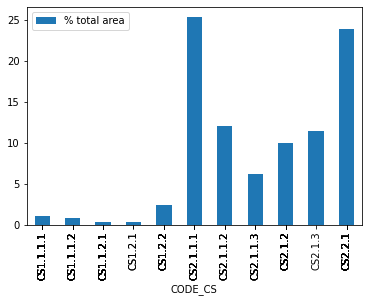

In [69]:
agg_mat_conf_by_dep[agg_mat_conf_by_dep["DEP"] == "11"].plot(kind="bar", x="CODE_CS", y ="% total area")

In [85]:
"""
index = agg_mat_conf_by_dep["DEP"].unique()
cols = agg_mat_conf_by_dep["CODE_CS"].unique()
mat_conf_dep_cs = pd.DataFrame([], index=index, columns=cols)
"""
agg_mat_conf_by_dep_cs = mat_conf.groupby(["DEP", "CODE_CS"]).sum(["% total area"])
agg_mat_conf_by_dep_cs.reset_index(level=[0, 1], inplace=True)
agg_mat_conf_by_dep_cs = agg_mat_conf_by_dep_cs.pivot(index="DEP", columns="CODE_CS", values="% total area").fillna(0)
agg_mat_conf_by_dep_cs.to_csv(os.path.join(PATH_TO_CONF, 'agg_mat_conf_by_dep_cs.csv'))
agg_mat_conf_by_dep_cs

CODE_CS  CS1.1.1.1  CS1.1.1.2  CS1.1.2.1  CS1.1.2.2   CS1.2.1   CS1.2.2  \
DEP                                                                       
11        1.046343   1.054371   0.521491   0.000000  0.251138  2.639057   
12        0.867049   1.412001   0.351316   0.000175  0.035040  0.770298   
2A        0.512555   0.754815   0.208621   0.000146  2.744214  0.303985   
2B        0.500932   0.729715   0.238190   0.000116  3.002858  1.012680   
30        1.855619   1.710881   1.300690   0.000000  0.280066  3.077256   
31        2.626700   2.794296   0.647003   0.000000  0.733728  1.103592   
32        0.852825   1.579908   0.291308   0.000028  0.000928  0.894485   
34        2.226135   2.040621   0.826565   0.000593  0.384124  3.415383   
44        2.923534   2.771626   1.238087   0.001091  0.082027  6.443861   
46        0.953301   1.821403   0.325841   0.000000  0.005684  0.594174   
48        0.392992   0.801054   0.170079   0.000142  0.094613  0.487509   
49        2.072450   2.230690   0.887911   0.000000  0.098217  1.997932   
53        1.451633   1.373670   1.457705   0.000000  0.000000  0.841136   
65        1.144842   1.180611   0.244358   0.005287  6.341357  0.782233   
66        1.744713   1.549256   0.769166   0.006728  1.294176  1.986474   
7         0.996895   1.129540   0.306430   0.000116  0.442486  0.739067   
72        1.681035   1.747497   0.776916   0.000327  0.000962  0.851009   
79        1.084483   1.136942   0.333530   0.005690  0.000172  0.195371   
81        1.327829   1.738609   0.420996   0.000410  0.008923  0.921975   
82        1.399867   2.337154   0.407918   0.000465  0.000798  1.392638   
85        2.395702   2.240905   1.581290   0.000107  0.058824  6.822613   
9         0.703893   0.817846   0.162013   0.001573  2.297148  0.657939   
972       4.231687   2.546661   0.469495   0.014772  0.406507  0.576859   

CODE_CS   CS1.2.3  CS2.1.1.1  CS2.1.1.2  CS2.1.1.3    CS2.1.2    CS2.1.3  \
DEP                                                                        
11       0.000000  27.298643  12.166466   6.458012  15.094893  11.386347   
12       0.000000  27.708116   4.314664   2.715905   5.761501   0.053932   
2A       0.000000  55.084205   9.291752   9.509401  18.933301   0.272762   
2B       0.000000  45.726581   8.749297   6.011498  29.145532   1.250345   
30       0.000000  42.406569   6.906270   7.556992   7.983075  10.340235   
31       0.000000  24.929579   0.512518   2.224435   2.651448   0.277079   
32       0.000000  14.585872   0.439775   0.360740   1.300778   3.025241   
34       0.000000  38.056949   7.814598   5.054454  13.216212  15.035939   
44       0.000000  11.305664   1.288566   0.872871   0.857705   1.898584   
46       0.000000  43.153393   1.259667   1.650354   4.500672   1.031470   
48       0.000000  21.086045  23.661696   9.680917   8.981093   0.002240   
49       0.000000  13.536474   3.150534   1.125595   0.474869   2.912893   
53       0.000000   8.612175   0.952215   0.324901   0.171102   0.000000   
65       0.000096  25.986000   6.258752   3.542005  11.341709   0.131836   
66       0.000000  35.932193  14.881477   2.594698  21.356436   6.088536   
7        0.000000  34.685523  12.708466  11.190020  11.296179   2.094661   
72       0.000000  17.211315   5.242400   1.372557   0.856992   0.043739   
79       0.000000   3.890945   0.039931   0.133553   0.200075   0.036891   
81       0.000000  25.644639   5.857544   2.784183   1.986362   1.260650   
82       0.000000  30.283665   0.443398   0.313068   2.113903   0.906328   
85       0.000000   6.335990   1.152156   0.533736   0.486584   0.230074   
9        0.000595  42.784627   6.934559   3.395773  15.221600   0.020742   
972      0.000000  58.156697   0.002172   0.000000   4.775117   0.000000   

CODE_CS    CS2.2.1   CS2.2.2  
DEP                           
11       28.034620  0.000000  
12       57.891570  0.000000  
2A        9.813863  0.000000  
2B       10.490831  0.000000  
30       22.800123  0.000000  
31    

In [84]:
agg_mat_conf_by_dep_us = mat_conf.groupby(["DEP", "CODE_US"]).sum(["% total area"])
agg_mat_conf_by_dep_us.reset_index(level=[0, 1], inplace=True)
agg_mat_conf_by_dep_us = agg_mat_conf_by_dep_us.pivot(index="DEP", columns="CODE_US", values="% total area").fillna(0)
agg_mat_conf_by_dep_us.to_csv(os.path.join(PATH_TO_CONF, 'agg_mat_conf_by_dep_us.csv'))
agg_mat_conf_by_dep_us

CODE_US      US1.1      US1.2     US1.3     US1.4     US1.5      US235  \
DEP                                                                      
11       37.668655  53.466066  0.273156  0.003577  0.000000   4.139898   
12       57.957490  33.953013  0.054906  0.000881  0.000000   3.525583   
2A        6.578194  72.541791  0.052181  0.000000  0.000000   3.502700   
2B       11.664101  58.187899  0.091863  0.000000  0.000000   3.006240   
30       29.500071  53.546940  0.568383  0.000000  0.000000   7.900369   
31       65.431353  26.256241  0.200199  0.000171  0.000000  11.487315   
32       80.441969  14.000481  0.023353  0.000000  0.000000   5.041750   
34       31.096037  48.288688  0.304847  0.105007  0.000000   7.355321   
44       77.237294  11.072870  0.530100  0.001356  0.000000  11.461614   
46       45.700282  44.974975  0.067746  0.000389  0.000000   5.126286   
48       44.951636  54.026460  0.046304  0.000455  0.000000   1.579832   
49       81.303910  15.728622  0.154899  0.005714  0.000000   8.225199   
53       92.334819   8.951776  0.241955  0.000000  0.000000   4.688969   
65       36.543008  34.944646  0.061064  0.000570  0.000000   4.662717   
66       15.749140  54.188633  0.152462  0.001619  0.000000   5.200511   
7        28.128404  58.220720  0.076678  0.000241  0.000000   5.499966   
72       74.132021  21.653316  0.143909  0.000000  0.000000   8.843073   
79       39.184365   3.495544  0.015990  0.000000  0.000000   3.932416   
81       59.624557  32.485409  0.106624  0.000279  0.000000   6.789939   
82       68.284583  26.100863  0.118575  0.005272  0.000068   7.949329   
85       82.027197   6.859850  0.683782  0.058563  0.000000   9.072398   
9        27.282202  52.542547  0.106246  0.000083  0.000801   3.060069   
972      24.450802  47.001088  0.171302  0.013578  0.000000  18.983454   

CODE_US   US4.1.1   US4.1.2   US4.1.3   US4.1.4  US4.1.5     US4.2     US4.3  \
DEP                                                                            
11       0.968046  0.052238  0.038581  0.092909  0.00000  0.000000  0.102692   
12       1.324625  0.029582  0.014193  0.000000  0.00000  0.000028  0.019605   
2A       0.629521  0.009447  0.093713  0.029642  0.00000  0.000000  0.054162   
2B       0.584780  0.029091  0.053841  0.024830  0.00000  0.000000  0.038692   
30       1.419873  0.095392  0.111916  0.115265  0.00000  0.000000  0.120485   
31       2.305784  0.087753  0.255880  0.025577  0.00000  0.006396  0.058562   
32       1.512342  0.018997  0.020966  0.000000  0.00000  0.000000  0.040956   
34       1.566841  0.061703  0.071094  0.172545  0.00000  0.000000  0.165206   
44       2.321684  0.123950  0.092573  0.043097  0.00000  0.008017  0.124215   
46       1.925910  0.053110  0.018955  0.000027  0.00000  0.000000  0.083304   
48       0.779633  0.031689  0.015543  0.000000  0.00000  0.000000  0.042157   
49       2.089171  0.052215  0.043233  0.000000  0.00000  0.000000  0.103696   
53       1.246665  0.030146  0.015346  0.000000  0.00000  0.000063  0.032901   
65       1.129271  0.048082  0.071911  0.000000  0.00000  0.002276  0.101008   
66       1.342180  0.087472  0.055120  0.043827  0.00000  0.000000  0.098087   
7        0.889943  0.043973  0.010236  0.000614  0.00000  0.000000  0.040777   
72       1.699710  0.120584  0.027932  0.000000  0.00000  0.000191  0.057893   
79       1.101212  0.092897  0.086077  0.000000  0.00000  0.005284  0.052652   
81       1.635546  0.035763  0.044584  0.000000  0.00000  0.000936  0.078815   
82       2.217913  0.061282  0.024924  0.004243  0.00000  0.000000  0.066929   
85       2.097154  0.049128  0.027739  0.024491  0.00000  0.000000  0.070018   
9        0.711325  0.019891  0.017732  0.000000  0.00035  0.000000  0.018729   
972      1.792118  0.001205  0.206343  0.159683  0.00000  0.003403  0.107214   

CODE_US     US6.1     US6.2      US6.3     US6.6  
DEP                                               
11       0.015765  0.002959   9.126839  0.0000

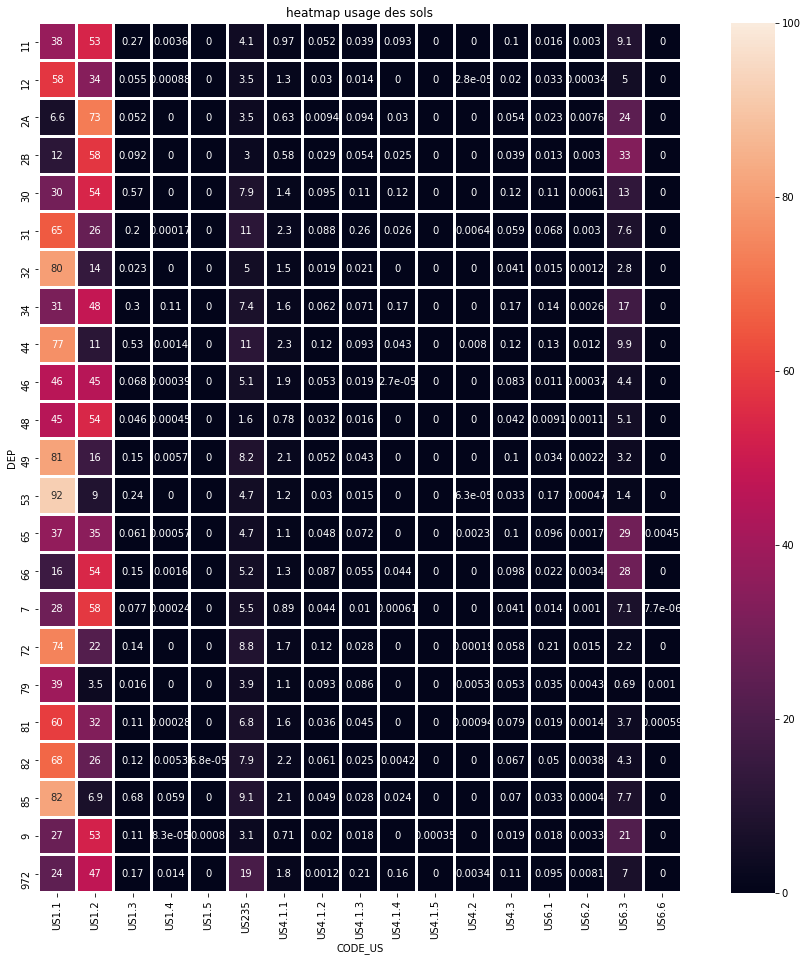

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18, 16))
ax0=plt.axes()
ax0.set_title("heatmap usage des sols")
sns.heatmap(agg_mat_conf_by_dep_us, annot=True, linewidths=2, ax=ax0,vmax=100, vmin=0, square=True)
plt.savefig(os.path.join(PATH_TO_CONF, "heatmap_usage_ocs.png"), dpi=400)

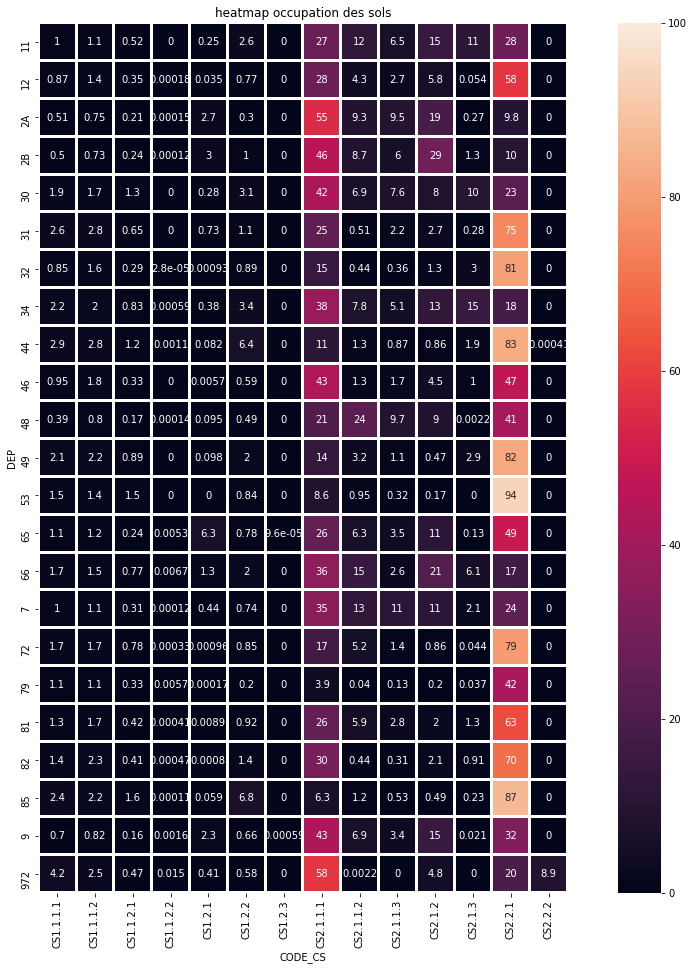

In [98]:
plt.figure(figsize=(18, 16))
ax0=plt.axes()
ax0.set_title("heatmap occupation des sols")
sns_cs = sns.heatmap(agg_mat_conf_by_dep_cs, annot=True, linewidths=2, ax=ax0,vmax=100, vmin=0, square=True)
plt.savefig(os.path.join(PATH_TO_CONF, "heatmap_ocs.png"), dpi=400)

In [104]:
agg_mat_conf_by_dep_cs = agg_mat_conf_by_dep_cs.reset_index()
agg_mat_conf_by_dep_cs["pays de la loire"] = agg_mat_conf_by_dep_cs["DEP"].apply(
    lambda x: "pays de la loire" if x in PAYS_DE_LA_LOIRE else "autres départements")
agg_mat_conf_by_dep_cs

CODE_CS  DEP  CS1.1.1.1  CS1.1.1.2  CS1.1.2.1  CS1.1.2.2   CS1.2.1   CS1.2.2  \
0         11   1.046343   1.054371   0.521491   0.000000  0.251138  2.639057   
1         12   0.867049   1.412001   0.351316   0.000175  0.035040  0.770298   
2         2A   0.512555   0.754815   0.208621   0.000146  2.744214  0.303985   
3         2B   0.500932   0.729715   0.238190   0.000116  3.002858  1.012680   
4         30   1.855619   1.710881   1.300690   0.000000  0.280066  3.077256   
5         31   2.626700   2.794296   0.647003   0.000000  0.733728  1.103592   
6         32   0.852825   1.579908   0.291308   0.000028  0.000928  0.894485   
7         34   2.226135   2.040621   0.826565   0.000593  0.384124  3.415383   
8         44   2.923534   2.771626   1.238087   0.001091  0.082027  6.443861   
9         46   0.953301   1.821403   0.325841   0.000000  0.005684  0.594174   
10        48   0.392992   0.801054   0.170079   0.000142  0.094613  0.487509   
11        49   2.072450   2.230690   0.887911   0.000000  0.098217  1.997932   
12        53   1.451633   1.373670   1.457705   0.000000  0.000000  0.841136   
13        65   1.144842   1.180611   0.244358   0.005287  6.341357  0.782233   
14        66   1.744713   1.549256   0.769166   0.006728  1.294176  1.986474   
15         7   0.996895   1.129540   0.306430   0.000116  0.442486  0.739067   
16        72   1.681035   1.747497   0.776916   0.000327  0.000962  0.851009   
17        79   1.084483   1.136942   0.333530   0.005690  0.000172  0.195371   
18        81   1.327829   1.738609   0.420996   0.000410  0.008923  0.921975   
19        82   1.399867   2.337154   0.407918   0.000465  0.000798  1.392638   
20        85   2.395702   2.240905   1.581290   0.000107  0.058824  6.822613   
21         9   0.703893   0.817846   0.162013   0.001573  2.297148  0.657939   
22       972   4.231687   2.546661   0.469495   0.014772  0.406507  0.576859   

CODE_CS   CS1.2.3  CS2.1.1.1  CS2.1.1.2  CS2.1.1.3    CS2.1.2    CS2.1.3  \
0        0.000000  27.298643  12.166466   6.458012  15.094893  11.386347   
1        0.000000  27.708116   4.314664   2.715905   5.761501   0.053932   
2        0.000000  55.084205   9.291752   9.509401  18.933301   0.272762   
3        0.000000  45.726581   8.749297   6.011498  29.145532   1.250345   
4        0.000000  42.406569   6.906270   7.556992   7.983075  10.340235   
5        0.000000  24.929579   0.512518   2.224435   2.651448   0.277079   
6        0.000000  14.585872   0.439775   0.360740   1.300778   3.025241   
7        0.000000  38.056949   7.814598   5.054454  13.216212  15.035939   
8        0.000000  11.305664   1.288566   0.872871   0.857705   1.898584   
9        0.000000  43.153393   1.259667   1.650354   4.500672   1.031470   
10       0.000000  21.086045  23.661696   9.680917   8.981093   0.002240   
11       0.000000  13.536474   3.150534   1.125595   0.474869   2.912893   
12       0.000000   8.612175   0.952215   0.324901   0.171102   0.000000   
13       0.000096  25.986000   6.258752   3.542005  11.341709   0.131836   
14       0.000000  35.932193  14.881477   2.594698  21.356436   6.088536   
15       0.000000  34.685523  12.708466  11.190020  11.296179   2.094661   
16       0.000000  17.211315   5.242400   1.372557   0.856992   0.043739   
17       0.000000   3.890945   0.039931   0.133553   0.200075   0.036891   
18       0.000000  25.644639   5.857544   2.784183   1.986362   1.260650   
19       0.000000  30.283665   0.443398   0.313068   2.113903   0.906328   
20       0.000000   6.335990   1.152156   0.533736   0.486584   0.230074   
21       0.000595  42.784627   6.934559   3.395773  15.221600   0.020742   
22       0.000000  58.156697   0.002172   0.000000   4.775117   0.000000   

CODE_CS    CS2.2.1   CS2.2.2     pays de la loire  
0        28.034620  0.000000  autres départements  
1        57.891570  0.000000  autres départements  
2         9.813863  0.000000  autres départements  
3        10.490831  0.000000  autres départeme

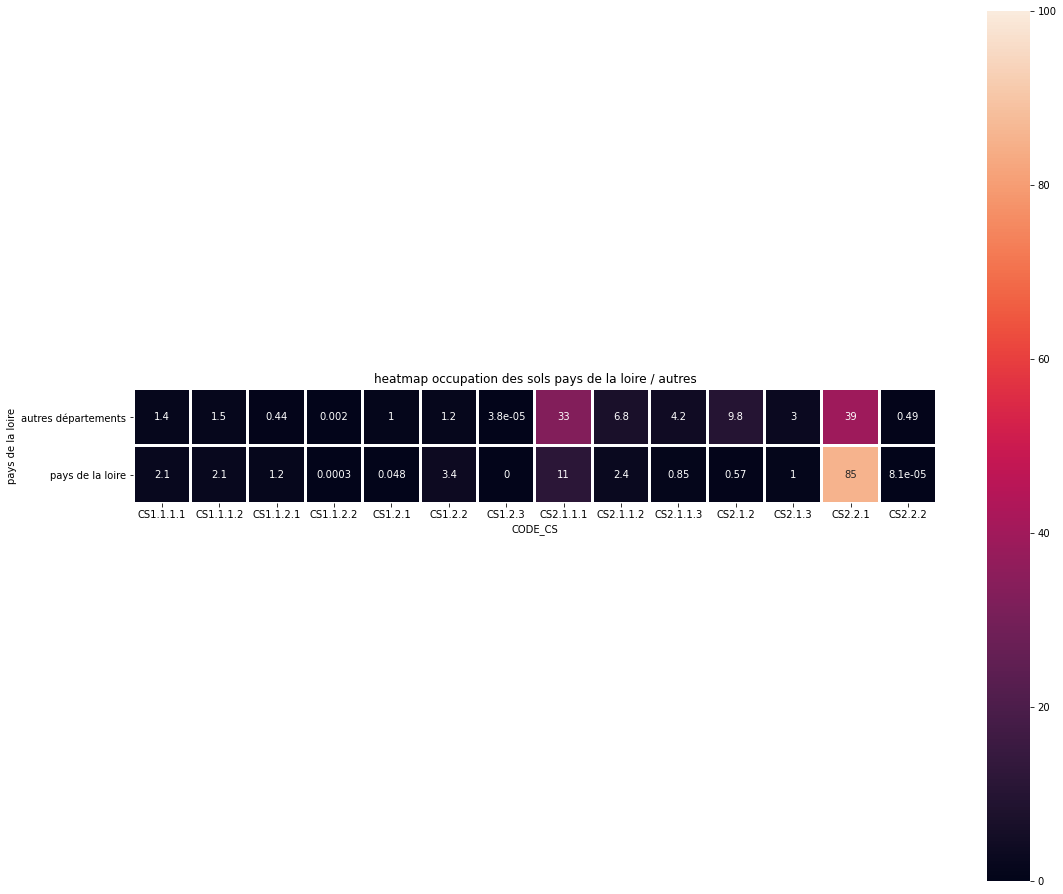

In [107]:
plt.figure(figsize=(18, 16))
ax0=plt.axes()
ax0.set_title("heatmap occupation des sols pays de la loire / autres")
sns_cs = sns.heatmap(agg_mat_conf_by_dep_cs.groupby(["pays de la loire"]).mean(), annot=True, linewidths=2, ax=ax0,vmax=100, vmin=0, square=True)
plt.savefig(os.path.join(PATH_TO_CONF, "heatmap_ocs-pays_de_la_loire_vs_autres.png"), dpi=400)


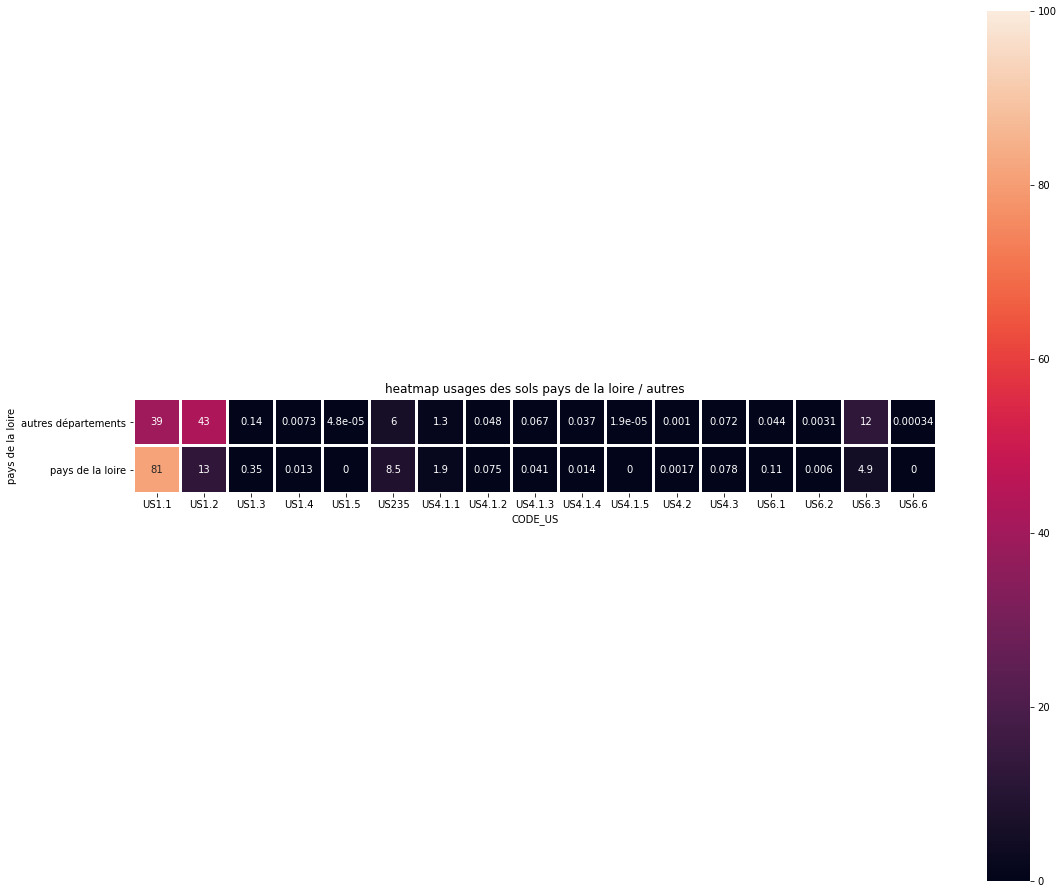

In [108]:
agg_mat_conf_by_dep_us = agg_mat_conf_by_dep_us.reset_index()
agg_mat_conf_by_dep_us["pays de la loire"] = agg_mat_conf_by_dep_us["DEP"].apply(
    lambda x: "pays de la loire" if x in PAYS_DE_LA_LOIRE else "autres départements")
plt.figure(figsize=(18, 16))
ax0=plt.axes()
ax0.set_title("heatmap usages des sols pays de la loire / autres")
sns_cs = sns.heatmap(agg_mat_conf_by_dep_us.groupby(["pays de la loire"]).mean(), annot=True, linewidths=2, ax=ax0,vmax=100, vmin=0, square=True)
plt.savefig(os.path.join(PATH_TO_CONF, "heatmap_ocs_usages-pays_de_la_loire_vs_autres.png"), dpi=400)